# MODULES & LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
import lightgbm as lgb
from xgboost import XGBClassifier

In [ ]:
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [ ]:
training_data = pd.read_csv('/content/DiseaseTraining.csv')
testing_data = pd.read_csv('/content/DiseaseTesting.csv')

In [ ]:
training_data.drop('Unnamed: 133', axis=1, inplace=True)

In [ ]:
print('Shape of the training data is', training_data.shape)
print('Shape of the testing data is', testing_data.shape)

Shape of the training data is (4920, 133)
Shape of the testing data is (42, 133)


In [ ]:
print(training_data.head())
print(testing_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

# Data Description
**input data description here**

# Data Cleaning and Preprocessing
missing values, such and such...

In [ ]:
missing_train = training_data.isnull().sum()
print(missing_train)
missing_test = testing_data.isnull().sum()
print(missing_test)

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [ ]:
duplicate_rows = training_data.duplicated()

In [ ]:
print(training_data.columns)
print(testing_data.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


# Exploring Data Balancing

In [ ]:
# Count the number of data points with and without disease
unique_prognosis = training_data['prognosis'].value_counts()
print(unique_prognosis)
count_of_unique_prognosis = training_data['prognosis'].nunique()
print(count_of_unique_prognosis)
#41 unique elements/outcomes in the target label, what to do?
# Label encoding?


prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [ ]:
X_train = training_data.drop('prognosis', axis=1)
X_test = testing_data.drop('prognosis', axis=1)
y_train = training_data['prognosis']
y_test = testing_data['prognosis']

# Data Visualization

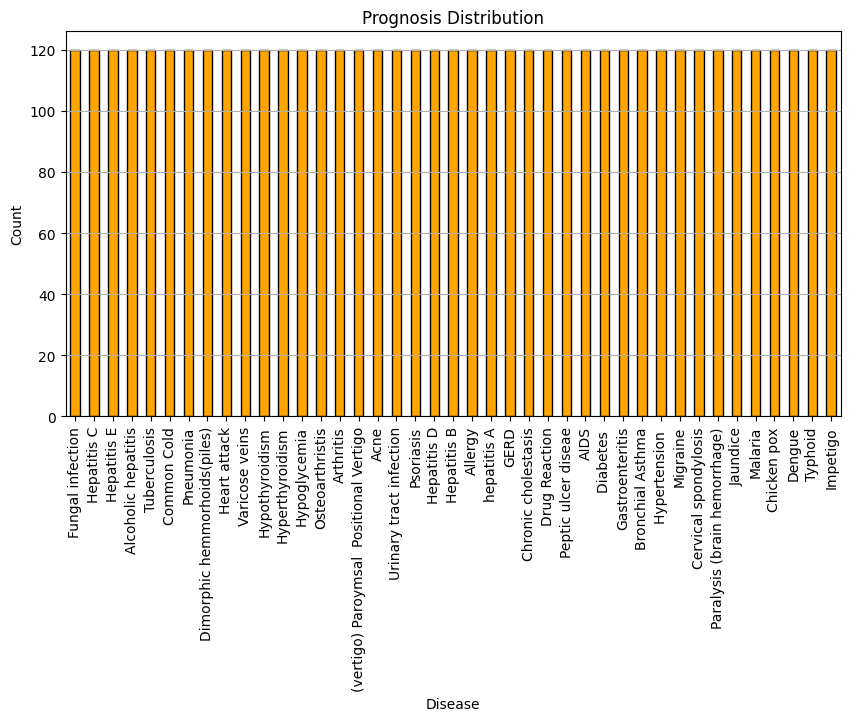

In [ ]:
# Bar Chart
#Prognosis Distribution
plt.figure(figsize=(10, 5))
unique_prognosis.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Prognosis Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

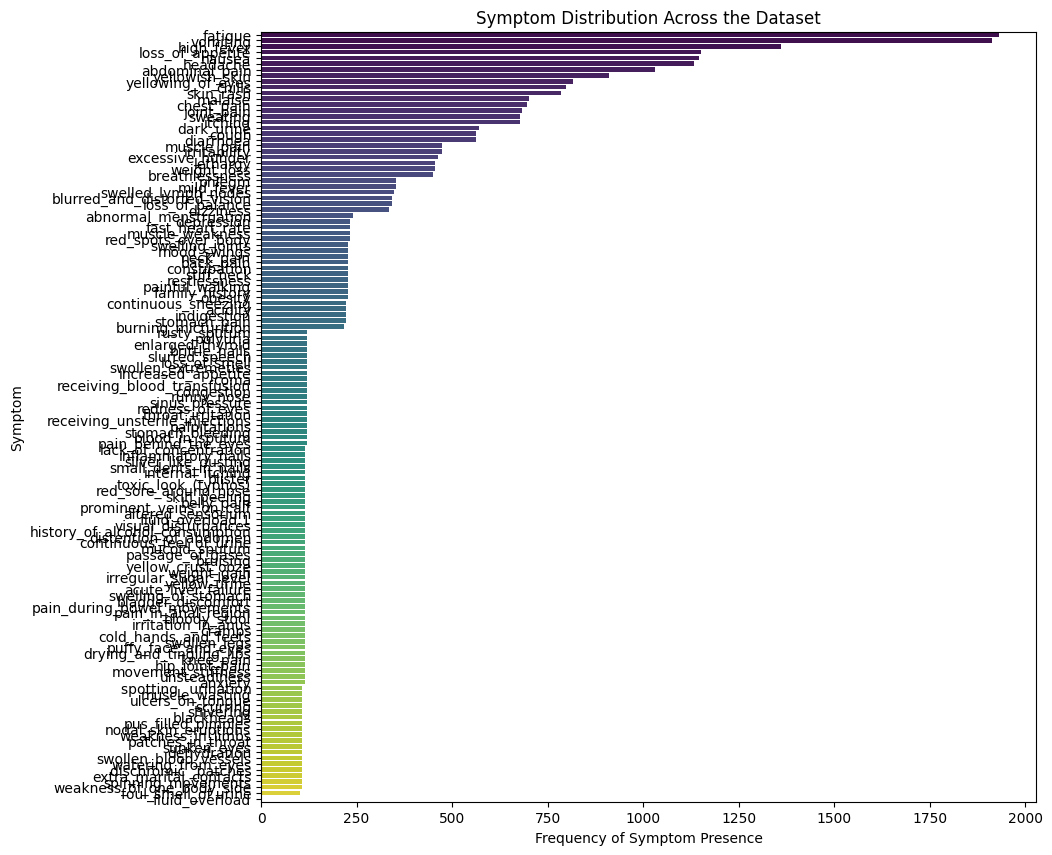

In [ ]:
# Symptom Distribution
symptom_columns = X_train.columns
symptom_counts = X_train.sum().sort_values(ascending=False)
#plot the bar chart
plt.figure(figsize=(10,10))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='viridis')
plt.title('Symptom Distribution Across the Dataset')
plt.xlabel('Frequency of Symptom Presence')
plt.ylabel('Symptom')
plt.show()

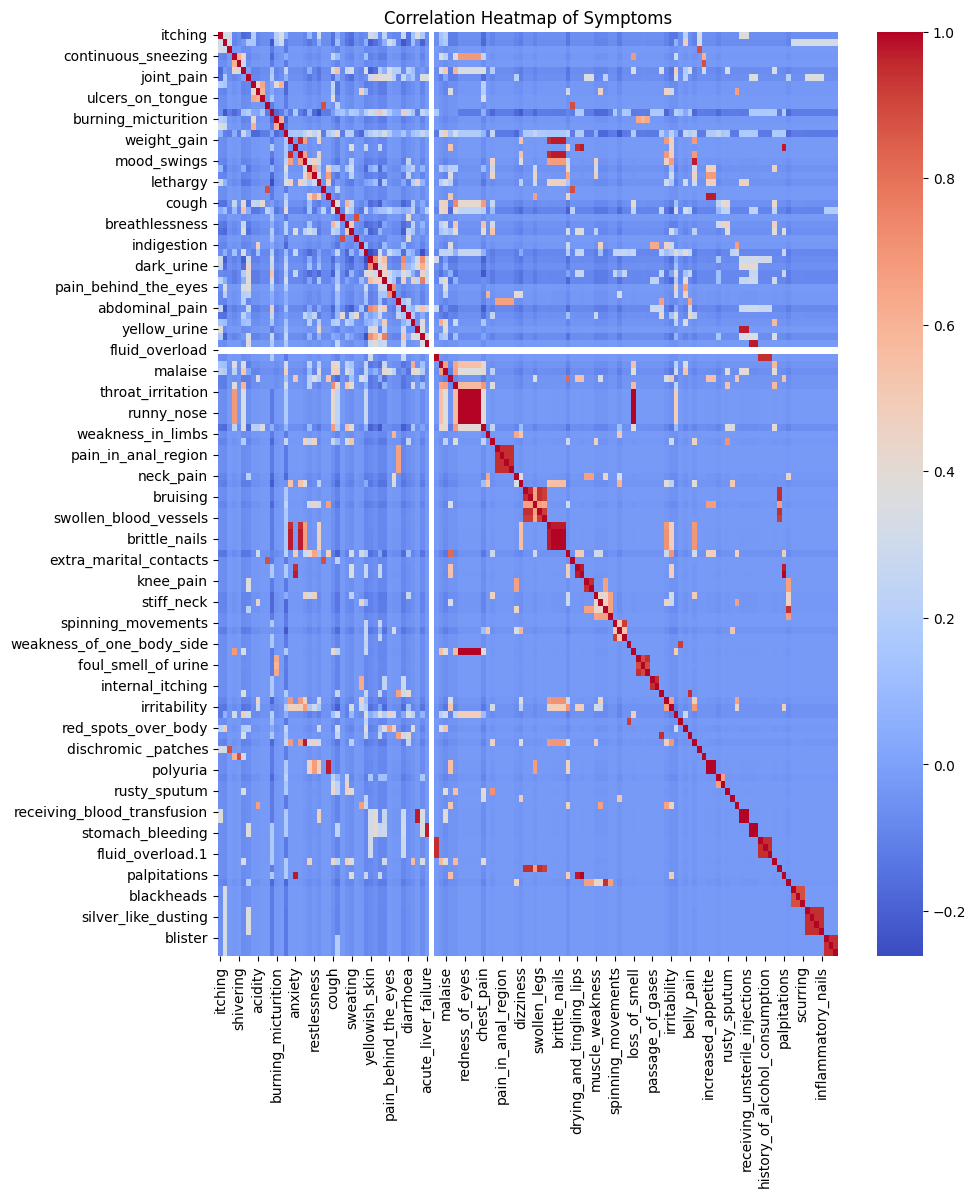

In [ ]:
# Symptom Correlation heatmap
plt.figure(figsize=(10,12))
sns.heatmap(X_train.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Symptoms')
plt.show()

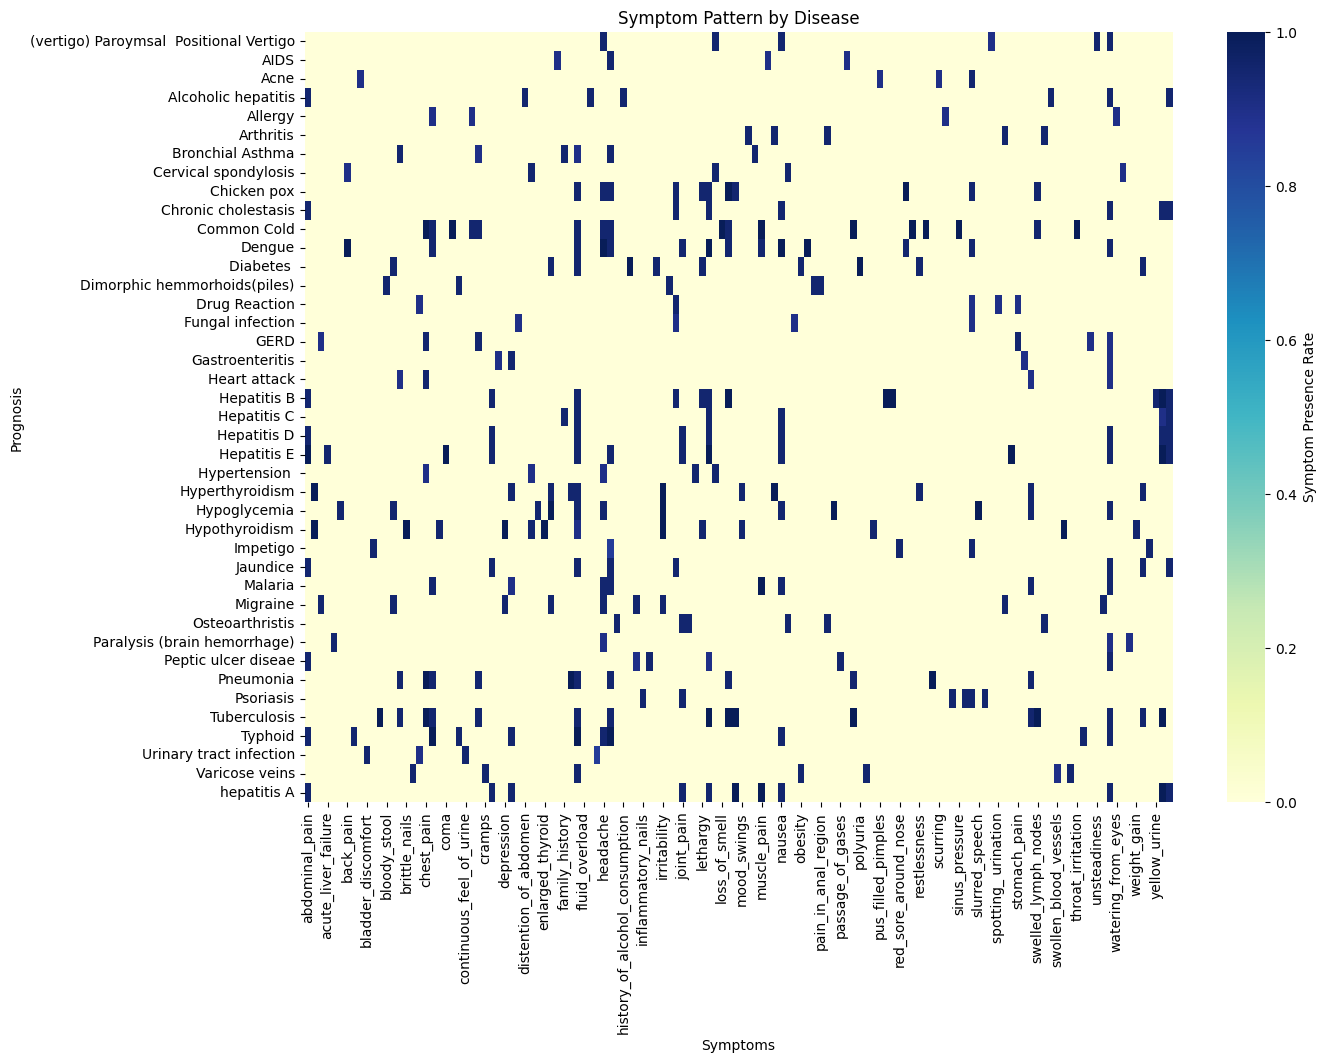

In [ ]:
# Symptoms pattern by disease heatmap
# Creating a pivot table to show the presence of symptoms for each prognosis
symptom_by_disease = X_train.pivot_table(index=y_train, values=X_train, aggfunc='mean')
#.columns
plt.figure(figsize=(14,10))
sns.heatmap(symptom_by_disease, cmap='YlGnBu', cbar_kws={'label': 'Symptom Presence Rate'})
plt.title('Symptom Pattern by Disease')
plt.xlabel('Symptoms')
plt.ylabel('Prognosis')
plt.show()

# Label Encoding Using One-Hot Encoding and Label Encoder

In [ ]:
# Onehot Encoder
encoder = OneHotEncoder()
y_train_onehot = encoder.fit_transform(y_train.values.reshape(-1, 1))
encoder = OneHotEncoder()
y_test_onehot = encoder.fit_transform(y_test.values.reshape(-1, 1))

In [ ]:
# Label Encoder
label_encoder = LabelEncoder()
y_train_labenc = label_encoder.fit_transform(y_train)
y_test_labenc = label_encoder.transform(y_test)

# PREDICTIVE MODEL DEVELOPMENT

ADABOOST WITH ONEHOT ENCODED Y_TRAIN AND Y_TEST

In [ ]:
# Initialize AdaBoost with a Decision Tree as the base estimator
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,  # Number of trees
    learning_rate=1.0,  # Controls the contribution of each classifier
    random_state=42
)
# Convert y_train from sparse matrix to a dense numpy array and then ravel it to 1D
'''I am using the argmax function to transform y_train to a 1D array,
which is what AdaBoost Classifier requires.'''
y_train_onehot_single = np.argmax(y_train_onehot.toarray(), axis=1)
ada_model_onehot = ada.fit(X_train, y_train_onehot_single)

# Model Prediction
y_test_onehot_single = np.argmax(y_test_onehot.toarray(), axis=1)
y_pred_ada = ada_model_onehot.predict(X_test)

In [ ]:
# PERFORMANCE METRICS
print("Accuracy:", accuracy_score(y_test_onehot_single, y_pred_ada))
print("Precision:", precision_score(y_test_onehot_single, y_pred_ada, average='macro'))
print("Recall:", recall_score(y_test_onehot_single, y_pred_ada, average='macro'))
print("F1-Score:", f1_score(y_test_onehot_single, y_pred_ada, average='macro'))
#print("ROC-AUC:", roc_auc_score(y_test_single, best_ada_model.predict_proba(X_test), multi_class='ovr'))

Accuracy: 0.11904761904761904
Precision: 0.0982028241335045
Recall: 0.12195121951219512
F1-Score: 0.09881175734834272


ADABOOST WITH LABEL ENCODED Y_TRAIN AND Y_TEST

In [ ]:
# Initialize AdaBoost with a Decision Tree as the base estimator
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,  # Number of trees
    learning_rate=1.0,  # Controls the contribution of each classifier
    random_state=42
)
# Convert y_train from sparse matrix to a dense numpy array and then ravel it to 1D
ada_model_labenc = ada.fit(X_train, y_train_labenc)

In [ ]:
y_pred_ada = ada_model_labenc.predict(X_test)

In [ ]:
# PERFORMANCE METRICS
print("Accuracy:", accuracy_score(y_test_labenc, y_pred_ada))
print("Precision:", precision_score(y_test_labenc, y_pred_ada, average='macro'))
print("Recall:", recall_score(y_test_labenc, y_pred_ada, average='macro'))
print("F1-Score:", f1_score(y_test_labenc, y_pred_ada, average='macro'))
#print("ROC-AUC:", roc_auc_score(y_test_single, best_ada_model.predict_proba(X_test), multi_class='ovr'))

Accuracy: 0.11904761904761904
Precision: 0.0982028241335045
Recall: 0.12195121951219512
F1-Score: 0.09881175734834272


HYPERPARAMETER TUNING WITH ADABOOST ON ORDINARY Y_TRAIN AND Y_TEST, LABENC AND ONEHOT

In [ ]:
# Grid Search with Onehot
# Parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train_onehot_single)

# Best parameters and model
best_params = grid_search.best_params_
best_ada_model = grid_search.best_estimator_


In [ ]:
print("Best Parameters:", best_params)
print("Best Ada Model", best_ada_model)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Ada Model AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200, random_state=42)


In [ ]:
best_ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,  # Number of trees
    learning_rate=0.1,  # Controls the contribution of each classifier
    random_state=42
)

In [ ]:
# OPTIMIZED ADABOOST WITH ONEHOT ENCODED Y_TRAIN
ada_model_onehot_opt = best_ada.fit(X_train, y_train_onehot_single)
# Model Prediction
y_pred_best_ada_onehot = ada_model_onehot_opt.predict(X_test)

In [ ]:
# PERFORMANCE METRICS
print("Accuracy:", accuracy_score(y_test_onehot_single, y_pred_best_ada_onehot))
print("Precision:", precision_score(y_test_onehot_single, y_pred_best_ada_onehot, average='macro'))
print("Recall:", recall_score(y_test_onehot_single, y_pred_best_ada_onehot, average='macro'))
print("F1-Score:", f1_score(y_test_onehot_single, y_pred_best_ada_onehot, average='macro'))

Accuracy: 0.9761904761904762
Precision: 0.9878048780487805
Recall: 0.9878048780487805
F1-Score: 0.9837398373983739


In [ ]:
# OPTIMIZED ADABOOST WITH LABEL ENCODED Y_TRAIN
# MODEL TRAINING
ada_model_labenc_opt = best_ada.fit(X_train, y_train_labenc)
# MODEL PREDICTION
y_pred_best_ada_labenc = ada_model_labenc_opt.predict(X_test)

In [ ]:
# PERFORMANCE METRICS
print("Accuracy:", accuracy_score(y_test_labenc, y_pred_best_ada_labenc))
print("Precision:", precision_score(y_test_labenc,y_pred_best_ada_labenc, average='macro'))
print("Recall:", recall_score(y_test_labenc, y_pred_best_ada_labenc, average='macro'))
print("F1-Score:", f1_score(y_test_labenc, y_pred_best_ada_labenc, average='macro'))

Accuracy: 0.9761904761904762
Precision: 0.9878048780487805
Recall: 0.9878048780487805
F1-Score: 0.9837398373983739


In [ ]:
# OPTIMIZED ADABOOST WITH ORDINARY Y_TRAIN
# MODEL TRAINING
ada_model_ord_opt = best_ada.fit(X_train, y_train)
# MODEL PREDICTION
y_pred_ord_ada = ada_model_ord_opt.predict(X_test)

In [ ]:
# PERFORMANCE METRICS
print("Accuracy:", accuracy_score(y_test, y_pred_ord_ada))
print("Precision:", precision_score(y_test,y_pred_ord_ada, average='macro'))
print("Recall:", recall_score(y_test, y_pred_ord_ada, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_ord_ada, average='macro'))

Accuracy: 0.9761904761904762
Precision: 0.9878048780487805
Recall: 0.9878048780487805
F1-Score: 0.9837398373983739


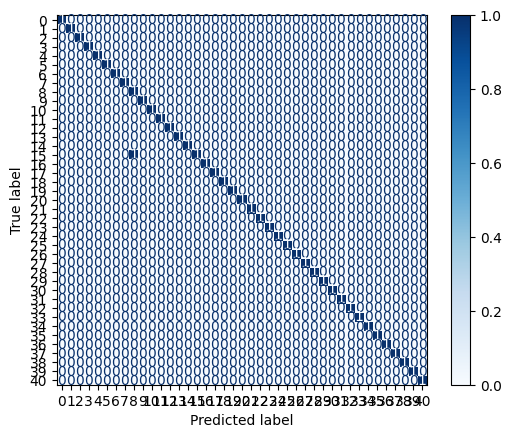

In [ ]:
# Assuming `y_test` is the true labels and `y_pred` are the predictions from your model
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ord_ada)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ada.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
roc_auc_ada = roc_auc_score(y_test, best_ada.predict_proba(X_test), multi_class='ovr')
print("ROC-AUC:", roc_auc_ada)

ROC-AUC: 0.999390243902439


NO NEED FOR ROC-AUC CURVE

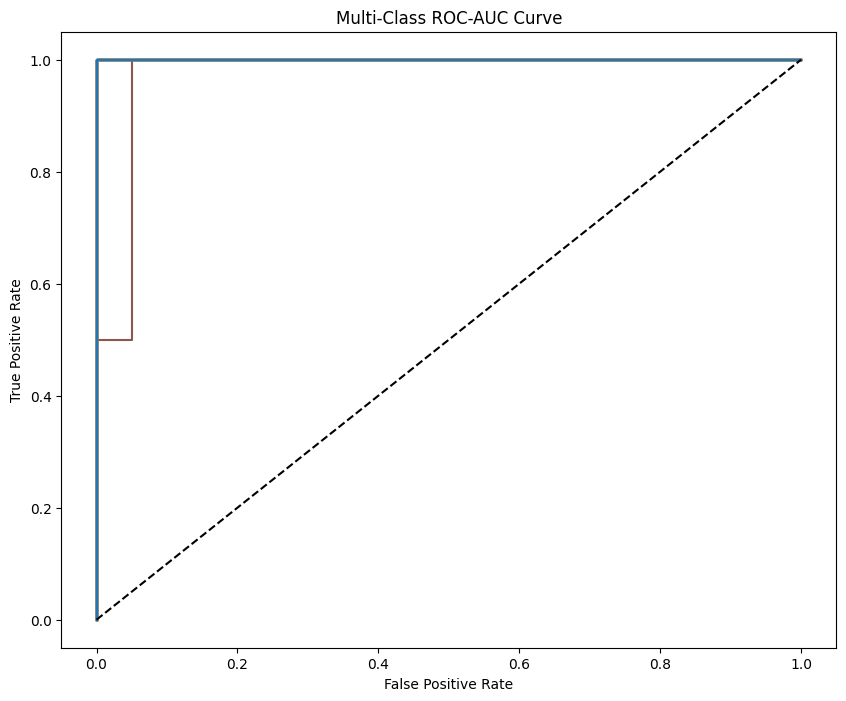

In [ ]:
# ROC-AUC CURVE
# Assuming X_train, X_test, y_train, y_test, and best_ada are already defined
# Binarize the output labels to perform one-vs-rest (OvR) ROC-AUC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_score = best_ada.predict_proba(X_test)

# Initialize variables to store false positive rate, true positive rate, and AUC for each class
false_positive = dict()
true_positive = dict()
roc_auc = dict()

# Calculate FPR, TPR, and AUC for each class
for i in range(n_classes):
    false_positive[i], true_positive[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive[i], true_positive[i])

# Plotting the ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(false_positive[i], true_positive[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Setting up the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC-AUC Curve')
#plt.legend(loc="best")
plt.show()


JUST TESTING MODEL PERFORMANCE

In [ ]:
y_train_pred = best_ada.predict(X_train)
y_test_pred = best_ada.predict(X_test)

In [ ]:
# PERFORMANCE METRICS
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='macro'))
print("Recall:", recall_score(y_train, y_train_pred, average='macro'))
print("F1-Score:", f1_score(y_train, y_train_pred, average='macro'))

Accuracy: 0.9951219512195122
Precision: 0.9954017527188258
Recall: 0.9951219512195121
F1-Score: 0.9951150757046371


LIGHT GBM

In [ ]:
params = {
    'objective': 'multiclass',  # Multi-class classification
    'metric': 'multi_logloss',  # Multi-class log loss
    'boosting_type': 'gbdt',    # The most common boosting type
    'max_depth': -1,
    'num_class': 41,            # Number of possible classes (41 diseases)
    'num_leaves': 31,           # Hyperparameter, can be tuned
    'learning_rate': 0.1,      # Hyperparameter, can be tuned
    'feature_fraction': 0.9     # Fraction of features used for each iteration
}
lgb_clf = lgb.LGBMClassifier(**params, n_estimators=50, verbose = -1, random_state = 42)
lgb_clf.fit(X_train, y_train_onehot_single)
y_pred_lgb = lgb_clf.predict(X_test)


In [ ]:
print(y_pred_lgb)
print(y_test_onehot_single)

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27  8]
[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 15]


In [ ]:
# PERFORMANCE METRICS
print("Accuracy:", accuracy_score(y_test_onehot_single, y_pred_lgb))
print("Precision:", precision_score(y_test_onehot_single, y_pred_lgb, average='macro'))
print("Recall:", recall_score(y_test_onehot_single, y_pred_lgb, average='macro'))
print("F1-Score:", f1_score(y_test_onehot_single, y_pred_lgb, average='macro'))

Accuracy: 0.9761904761904762
Precision: 0.9878048780487805
Recall: 0.9878048780487805
F1-Score: 0.9837398373983739


DO I NEED TO DO A CLASSIFICATION REPORT FOR EACH OF THE MODELS?

XGBOOST

In [ ]:
xgb_model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train_onehot_single)
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# PERFORMANCE METRICS
print("Accuracy:", accuracy_score(y_test_onehot_single, y_pred_xgb))
print("Precision:", precision_score(y_test_onehot_single, y_pred_xgb, average='macro'))
print("Recall:", recall_score(y_test_onehot_single, y_pred_xgb, average='macro'))
print("F1-Score:", f1_score(y_test_onehot_single, y_pred_xgb, average='macro'))

Accuracy: 0.9761904761904762
Precision: 0.9878048780487805
Recall: 0.9878048780487805
F1-Score: 0.9837398373983739
